# Supermarket Sale Predictions 


## IMPORT MODULES



In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Pandas is used to load the dataset.
numpy is used to do operations with arrays and Matrices.
Seaborn and matplotlib is used to visualize the data set.
Warnings are used to avoid unneccessary information printed by the modules.


 

## LOADING THE DATASET

In [132]:
df = pd.read_csv ('D:\Dissertation\VaigaiTest.csv')
df.head() #printing top 5 of the dataset

,Name,Qty,SalesExcVAT,VATTotal,TotalPrice,GrossMargin,PercentOfTurnover
0,No Reporting Category,2544,7896.6926,30.32,7927.0126,0.49182,0.044697
1,Food,176,388.4300,0.25,388.6800,0.27717,0.002199
2,Drinks,1056,1012.7016,81.40,1094.1016,0.37525,0.005732
3,Snacks,15021,24717.9364,259.30,24977.2364,0.37118,0.139909
4,Indian chaat,162,470.0800,0.00,470.0800,0.32852,0.002661


In [61]:
# Statistical info
df.describe()

,Qty,SalesExcVAT,VATTotal,TotalPrice,GrossMargin,PercentOfTurnover
count,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000
mean,3.186815e+05,8618.149932,59.997073,8678.147005,0.368363,0.048780
std,1.359210e+06,27927.538150,197.381964,28117.994525,0.079256,0.158076
min,5.000000e+00,7.450000,0.000000,7.450000,0.256710,0.000042
25%,1.620000e+02,314.480400,0.000000,352.570000,0.309210,0.001780
50%,7.600000e+02,1258.597000,5.330000,1266.467000,0.361370,0.007124
75%,2.544000e+03,5677.149200,30.320000,5803.990200,0.392560,0.032134
max,6.532970e+06,176672.073600,1229.940000,177902.013600,0.602340,1.000000


In [62]:
# Datatype of attributes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               41 non-null     object 
 1   Qty                41 non-null     int64  
 2   SalesExcVAT        41 non-null     float64
 3   VATTotal           41 non-null     float64
 4   TotalPrice         41 non-null     float64
 5   GrossMargin        41 non-null     float64
 6   PercentOfTurnover  41 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.4+ KB


In [63]:
# Check unique values in dataset
df.apply(lambda x: len(x.unique()))

Name                 40
Qty                  41
SalesExcVAT          41
VATTotal             27
TotalPrice           41
GrossMargin          41
PercentOfTurnover    41
dtype: int64

## PREPROCESSING THE DATASET

In [64]:
# Check for null values
df.isnull().sum()

Name                 0
Qty                  0
SalesExcVAT          0
VATTotal             0
TotalPrice           0
GrossMargin          0
PercentOfTurnover    0
dtype: int64

The next step is to check for categorical attributes. This will iterate the datatype of the indexes.
If the column is of object type, the for loop is getting the columns from the datatypes of the dataset and we are checking the datatype of the corresponding column if its equal to object we are adding the columns to the categorical column.

In [65]:
# Check for categorical attributes
cat_col = []
for x in df.dtypes.index: 
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Name']

In [66]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Name
Frozen                   2
No Reporting Category    1
Food                     1
Miscellaneous            1
MTR                      1
Pickles                  1
Sweets                   1
Toiletries               1
Candy                    1
Health & Wellness        1
Chocolate                1
Ice Cream                1
Biscuits                 1
dairy                    1
Sea Food                 1
Beverages                1
Soup                     1
Rice Flakes              1
water                    1
Spread                   1
Ghee                     1
Oil                      1
Rice and Millets         1
Drinks                   1
Snacks                   1
Indian chaat             1
Vegetables               1
Tinned items             1
Groceries                1
Beauty                   1
Sauce                    1
Masala                   1
Spices                   1
Vermicelli               1
Rava                     1
Flour                    1
Nuts & Seeds           

## CREATION OF NEW ATTRIBUTES

In [67]:
df['New_Item_Type'] = df['Name'].apply(lambda x: x[:4])
df['New_Item_Type']

0     No R
1     Food
2     Drin
3     Snac
4     Indi
5     Vege
6     Tinn
7     Groc
8     Beau
9     Rice
10    Sauc
11    Spic
12    Verm
13    Rava
14    Flou
15    Nuts
16    Dhal
17    Frui
18    Masa
19     Oil
20    Ghee
21    Spre
22    Misc
23     MTR
24    Pick
25    Swee
26    Toil
27    Froz
28    Cand
29    Heal
30    Choc
31    Ice 
32    Froz
33    Bisc
34    dair
35    Sea 
36    Beve
37    Soup
38    Rice
39    wate
40    Tota
Name: New_Item_Type, dtype: object

In [68]:
df['New_Item_Type'] = df['New_Item_Type'].map({'Food':'Food Cupboard', 'Snac':'Food Cupboard', 'Tinn':'Food Cupboard', 'Sauc':'Food Cupboard', 'Nuts':'Food Cupboard', 'Pick':'Food Cupboard', 'Swee':'Food Cupboard', 'Beau':'Skincare', 'Heal':'Skincare', 'MTR ':'Ration', 'Groc':'Ration', 'Rice':'Ration', 'Spic':'Ration', 'Verm':'Ration', 'Rava':'Ration', 'Flou':'Ration', 'Dhal':'Ration', 'Masa':'Ration', 'Oil ':'Ration', 'Rice':'Ration', 'Vege':'Perishables','Frui':'Perishables', 'Indi':'Fresh Food', 'No R':'Misc', 'Misc':'Misc', 'Toil':'Misc', 'Froz':'Frozen Food', 'Froz':'Frozen Food', 'Ice ':'Frozen Food', 'Choc':'Confectionery','Bisc':'Confectionery', 'Cand':'Confectionery', 'Sea ':'Fish', 'Drin':'Consumables' ,'Beve':'Consumables', 'Dair':'Consumables', 'Soup':'Consumables','Wate':'Consumables'})
df['New_Item_Type'].value_counts()

Ration           9
Food Cupboard    7
Misc             3
Consumables      3
Frozen Food      3
Confectionery    3
Perishables      2
Skincare         2
Fresh Food       1
Fish             1
Name: New_Item_Type, dtype: int64

In [69]:
df.head()

,Name,Qty,SalesExcVAT,VATTotal,TotalPrice,GrossMargin,PercentOfTurnover,New_Item_Type
0,No Reporting Category,2544,7896.6926,30.32,7927.0126,0.49182,0.044697,Misc
1,Food,176,388.4300,0.25,388.6800,0.27717,0.002199,Food Cupboard
2,Drinks,1056,1012.7016,81.40,1094.1016,0.37525,0.005732,Consumables
3,Snacks,15021,24717.9364,259.30,24977.2364,0.37118,0.139909,Food Cupboard
4,Indian chaat,162,470.0800,0.00,470.0800,0.32852,0.002661,Fresh Food


## EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Qty', ylabel='Density'>

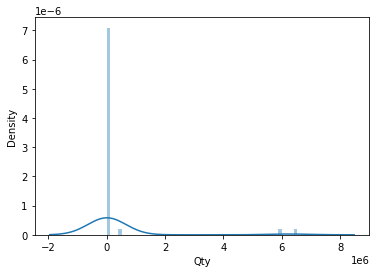

In [70]:
sns.distplot(df['Qty'])

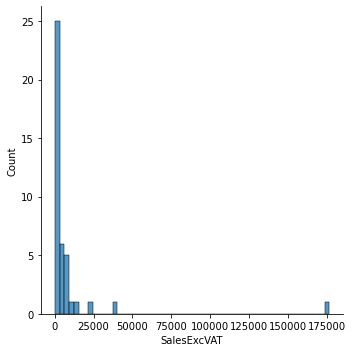

In [71]:
sns.displot(df['SalesExcVAT'])

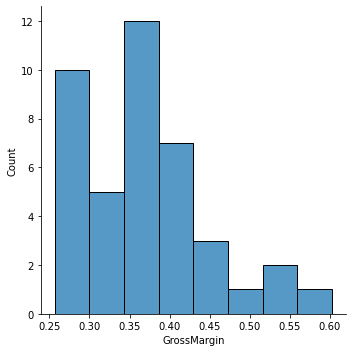

In [72]:
sns.displot(df['GrossMargin'])

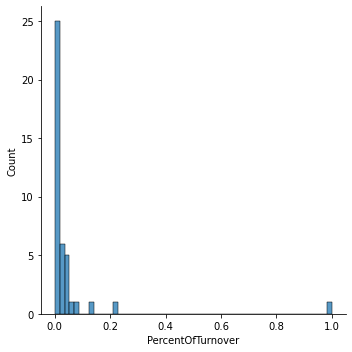

In [73]:
sns.displot(df['PercentOfTurnover'])

In [74]:
#Log transformation
df['SalesExcVAT'] = np.log(1+df['SalesExcVAT'])

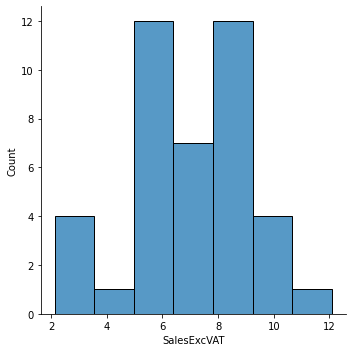

In [75]:
sns.displot(df['SalesExcVAT'])

<AxesSubplot:xlabel='New_Item_Type', ylabel='count'>

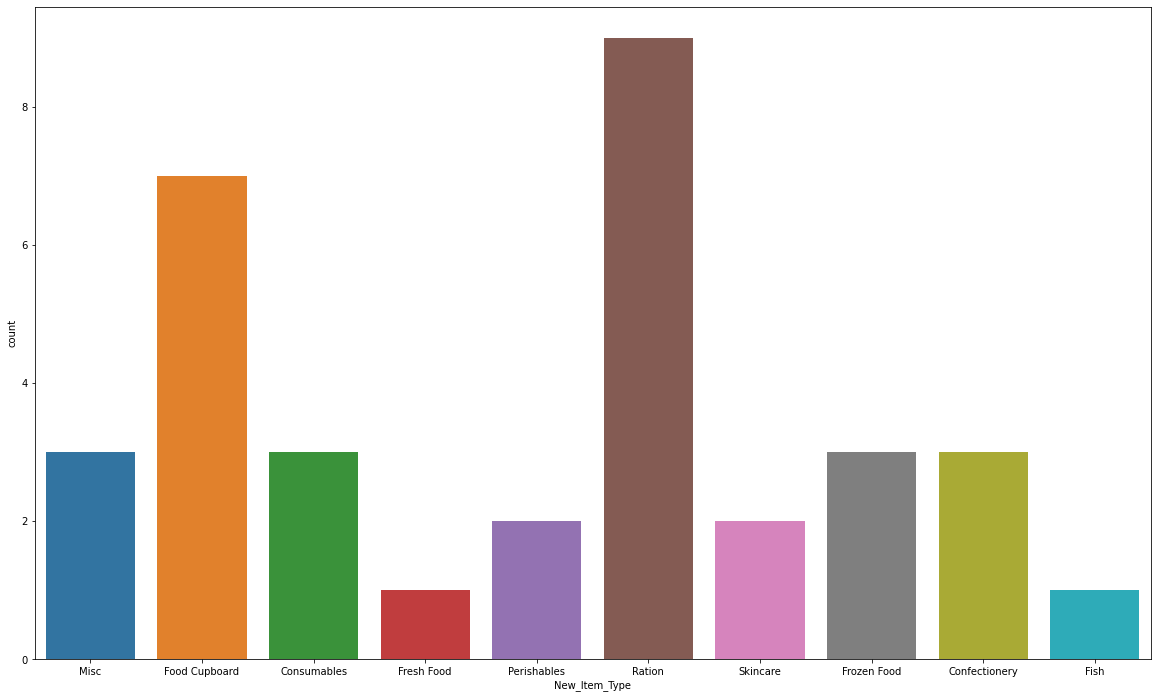

In [76]:
plt.figure(figsize=(20,12))
sns.countplot(df['New_Item_Type'])

## COORELATION MATRIX 

<AxesSubplot:>

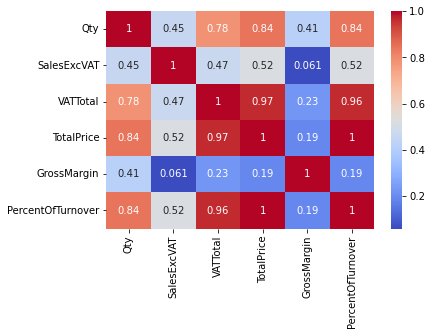

In [77]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## LABEL ENCODING

In [90]:
df.head()

,Name,Qty,SalesExcVAT,VATTotal,TotalPrice,GrossMargin,PercentOfTurnover,New_Item_Type,Product
0,19,2544,8.974326,30.32,7927.0126,0.49182,0.044697,6,19
1,8,176,5.964684,0.25,388.6800,0.27717,0.002199,3,8
2,6,1056,6.921364,81.40,1094.1016,0.37525,0.005732,1,6
3,28,15021,10.115325,259.30,24977.2364,0.37118,0.139909,3,28
4,15,162,6.155028,0.00,470.0800,0.32852,0.002661,4,15


In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Product']= le.fit_transform(df['Name'])
cat_col = ['Name','New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

## ONEHOT ENCODING 

In [93]:
df = pd.get_dummies(df, columns = ['New_Item_Type'])
df.head()

,Name,Qty,SalesExcVAT,VATTotal,TotalPrice,GrossMargin,PercentOfTurnover,Product,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,New_Item_Type_3,New_Item_Type_4,New_Item_Type_5,New_Item_Type_6,New_Item_Type_7,New_Item_Type_8,New_Item_Type_9,New_Item_Type_10
0,19,2544,8.974326,30.32,7927.0126,0.49182,0.044697,19,0,0,0,0,0,0,1,0,0,0,0
1,8,176,5.964684,0.25,388.6800,0.27717,0.002199,8,0,0,0,1,0,0,0,0,0,0,0
2,6,1056,6.921364,81.40,1094.1016,0.37525,0.005732,6,0,1,0,0,0,0,0,0,0,0,0
3,28,15021,10.115325,259.30,24977.2364,0.37118,0.139909,28,0,0,0,1,0,0,0,0,0,0,0
4,15,162,6.155028,0.00,470.0800,0.32852,0.002661,15,0,0,0,0,1,0,0,0,0,0,0


##  Input Split

We may train on the complete data set because this is not a classification problem; rather, it is a regression problem. This allows us to compare the actual values to the predicted values after training. Given that, we are going to come up with the error. Because of this, we are able to draw conclusions about the model, and as is customary, we may also perform cross validation. It will perform an automatic split of the data set according to our requirements.

In [94]:
X = df.drop(columns=['VATTotal', 'TotalPrice',])
y = df['SalesExcVAT']

## Model Training



In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:", mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 7.744305228084323e-30
CV Score: 1.4062541275710676e-29


<AxesSubplot:title={'center':'Model Coefficients'}>

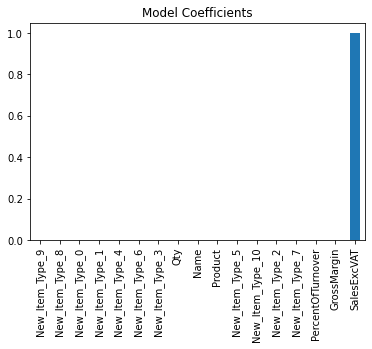

In [96]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficients")


In [97]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

Model Report
MSE: 0.931282527019258
CV Score: 1.727309625863833


<AxesSubplot:title={'center':'Model Coefficients'}>

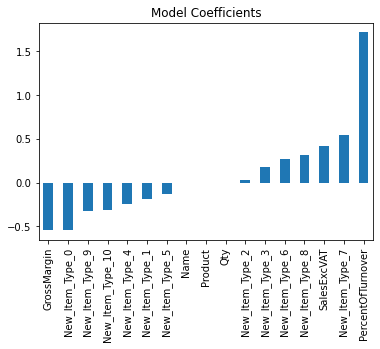

In [98]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficients")


## Lasso:

Model Report
MSE: 0.27257187895043405
CV Score: 0.3464474628752997


<AxesSubplot:title={'center':'Model Coefficients'}>

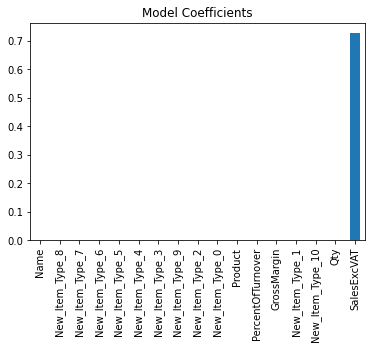

In [99]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

## Decision Tree

Model Report
MSE: 0.0
CV Score: 0.41773943107314493


<AxesSubplot:title={'center':'Feature Importance'}>

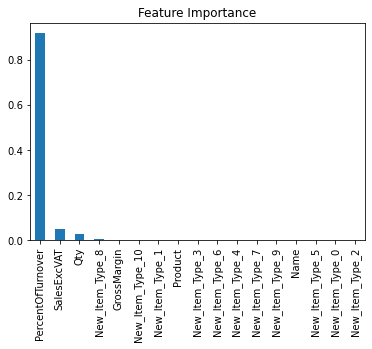

In [100]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

## Random Forest

Model Report
MSE: 0.026562606429466677
CV Score: 0.2246147982526106


<AxesSubplot:title={'center':'Feature Importance'}>

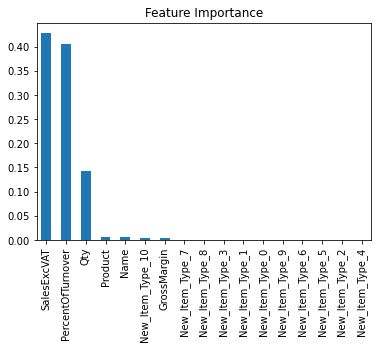

In [101]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

## Extra Trees

Model Report
MSE: 1.2307192146941955e-28
CV Score: 0.08907892737753516


<AxesSubplot:title={'center':'Feature Importance'}>

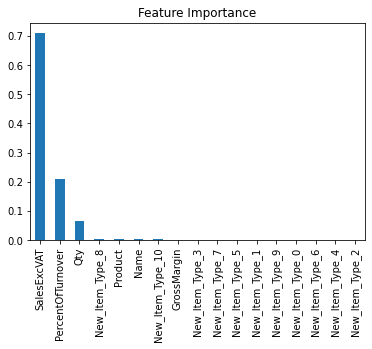

In [102]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")